# Dataset
https://www.kaggle.com/datasets/janmejaybhoi/cotton-disease-dataset 

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader    
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
import torchvision.utils as vutils

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## load dataset and transform into tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # use gpu or cpu
device

device(type='cuda')

In [4]:
data_dir = "/content/drive/MyDrive/Crop Dataset/cotton_dataset"

from os import listdir

train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

# train_imgs = os.listdir(train_dir + '/diseased cotton leaf')
# print(len(os.listdir(train_dir + '/diseased cotton leaf')))

In [5]:
listdir(train_dir)

['fresh cotton plant',
 'diseased cotton leaf',
 'fresh cotton leaf',
 'diseased cotton plant']

In [6]:
#transform each image
# transformer = transforms.Compose([
#     transforms.Resize(size = (224,224)),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

# for tinyVCG
transformer = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])


In [7]:
#Load dataset
from torchvision import datasets, transforms

train_data = torchvision.datasets.ImageFolder(
    root = train_dir,
    transform = transformer
)

valid_data = torchvision.datasets.ImageFolder(
    root = valid_dir,
    transform = transformer
)

test_data = torchvision.datasets.ImageFolder(
    root = test_dir,
    transform = transformer
)

In [8]:
len(train_data), len(valid_data),len(test_data)

(1951, 253, 106)

In [9]:
#Visualizing the data in tensor form

image, label = train_data[0]
image.shape, label

(torch.Size([3, 64, 64]), 0)

In [10]:
type(train_data[0]) #tuple
class_names = train_data.classes
class_names

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [11]:
# get index of each class......prediction 0 means diseased cotton leaf!
class_to_idx = train_data.class_to_idx
class_to_idx

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

Text(0.5, 1.0, 'diseased cotton leaf')

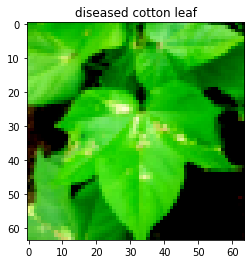

In [12]:
#plt.imshow(image.view(image.shape[1], image.shape[2], image.shape[0]))  
#change from CHW to HWC. pyplot needs HWC
plt.imshow(image.permute(1,2,0)) 
plt.title(class_names[label])

CPU times: user 463 ms, sys: 22.6 ms, total: 485 ms
Wall time: 16.9 s


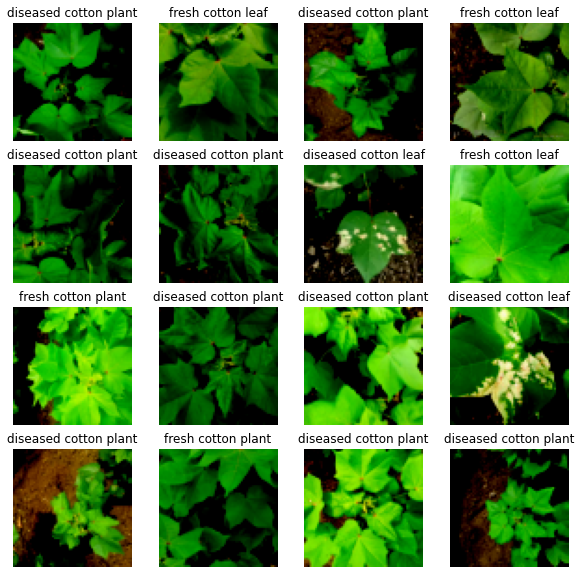

In [13]:
# Plot more images for SEEEEing them! with labels
%%time
torch.manual_seed(69)
fig = plt.figure(figsize=(10,10))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.permute(1,2,0))
    plt.title(class_names[label])
    plt.axis(False);

# Custom Dataset loading and manipulation

In [14]:
#visualise randomly among all datasets
from pathlib import Path
data_dir = Path("/content/drive/MyDrive/Crop Dataset/cotton_dataset")
image_path_list =list(data_dir.glob("*/*/*.jpg"))
len(image_path_list)


2310

#Data Loader
It helps load data into a model.

For training and for inference.

It turns a large `Dataset` into a Python iterable of smaller chunks.


In [15]:
train_data

Dataset ImageFolder
    Number of datapoints: 1951
    Root location: /content/drive/MyDrive/Crop Dataset/cotton_dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [16]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into datLoader, i.e. iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

valid_dataloader = DataLoader(valid_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=False # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=False # shuffle data every epoch?
)
len(train_dataloader), len(valid_dataloader), len(test_dataloader)

(61, 8, 4)

In [17]:
image.shape , type(image)

(torch.Size([3, 64, 64]), torch.Tensor)

#Pre-processing
normalise the H,W of each image. update: alreadydone using transform at the top


In [18]:
# image_size =[]
# for i in range(len(train_data)):
#     print(i)
#     img, label = train_data[i]
#     image_size.append(torchvision.transforms.functional.get_image_size(img))


In [19]:
#image_size 
#output shows two sizes of image 694,691 and 617


In [20]:
# import numpy as np
# import matplotlib.pyplot as plt
# plt.hist(np.array(img).ravel(), bins=50, density=True)

In [21]:
# plt.imshow(img.permute(1,2,0)) 
# img.shape

In [22]:
# # apply the transform on the input image to resize it to 256,256
# transform = transforms.Compose([
#     transforms.Resize(size = (256,256)),
    
#     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
# #transform= torchvision.transforms.Resize(size = (256,256))
# img_t=transform(img)
# plt.imshow(img_t.permute(1,2,0)) 
# plt.title(label)
# img_t.shape

In [23]:
# type(train_data.imgs)

Facing difficulty in resizing the image files


In [24]:
# for i in range(len(train_data)):
#     print(i)
#     train_data.imgs[i]= transform(train_data.imgs[i])


In [25]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

# Build base model



In [26]:
from torch import nn
class CottonDiseaseModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [27]:
#Instantiate model. create an instance of our model and send to the CPU for now

torch.manual_seed(69)
# Need to setup model with input parameters
model_0 = CottonDiseaseModelV0(input_shape=150528, # one for every pixel (3x224x224)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with 

CottonDiseaseModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=150528, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [28]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [29]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy()

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1) #tries to update our model's params to reduce the loss

In [30]:
# Install torchinfo if it's not available, import it if it is
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1,3, 224, 224]) # do a test pass through of an example input size 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
CottonDiseaseModelV0                     [1, 4]                    --
├─Sequential: 1-1                        [1, 4]                    --
│    └─Flatten: 2-1                      [1, 150528]               --
│    └─Linear: 2-2                       [1, 10]                   1,505,290
│    └─Linear: 2-3                       [1, 4]                    44
Total params: 1,505,334
Trainable params: 1,505,334
Non-trainable params: 0
Total mult-adds (M): 1.51
Input size (MB): 0.60
Forward/backward pass size (MB): 0.00
Params size (MB): 6.02
Estimated Total Size (MB): 6.62

In [31]:
# # Import tqdm for progress bar
# from timeit import default_timer as timer 
# from tqdm.auto import tqdm

# # Set the seed and start the timer
# torch.manual_seed(69)
# train_time_start_on_cpu = timer()

# # Set the number of epochs (we'll keep this small for faster training times)
# epochs = 3

# # Create training and testing loop
# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}\n-------")
#     ### Training
#     train_loss = 0
#     # Add a loop to loop through training batches
#     for batch, (X, y) in enumerate(train_dataloader):
#         model_0.train() 
#         # 1. Forward pass
#         y_pred = model_0(X)

#         # 2. Calculate loss (per batch)
#         loss = loss_fn(y_pred, y)
#         train_loss += loss # accumulatively add up the loss per epoch 

#         # 3. Optimizer zero grad
#         optimizer.zero_grad()

#         # 4. Loss backward
#         loss.backward()

#         # 5. Optimizer step
#         optimizer.step()

#         # Print out how many samples have been seen
#         if batch % 32 == 0:
#             print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

#     # Divide total train loss by length of train dataloader (average loss per batch per epoch)
#     train_loss /= len(train_dataloader)
    
#     ### Testing
#     # Setup variables for accumulatively adding up loss and accuracy 
#     test_loss, test_acc = 0, 0 
#     model_0.eval()
#     with torch.inference_mode():
#         for X, y in test_dataloader:
#             # 1. Forward pass
#             test_pred = model_0(X)
           
#             # 2. Calculate loss (accumatively)
#             test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

#             # 3. Calculate accuracy (preds need to be same as y_true)
#             test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
#         # Calculations on test metrics need to happen inside torch.inference_mode()
#         # Divide total test loss by length of test dataloader (per batch)
#         test_loss /= len(test_dataloader)

#         # Divide total accuracy by length of test dataloader (per batch)
#         test_acc /= len(test_dataloader)

#     ## Print out what's happening
#     print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# # Calculate training time      
# # train_time_end_on_cpu = timer()
# # total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
# #                                            end=train_time_end_on_cpu,
# #                                            device=str(next(model_0.parameters()).device))

## Using TinyVGG



In [32]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=4, bias=True)
  )
)

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_1.eval()
with torch.inference_mode():
    pred = model_1(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

In [ ]:
# Install torchinfo if it's not available, import it if it is
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_1, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size 

In [ ]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(train_dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(train_dataloader)
    train_acc = train_acc / len(train_dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(test_dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(test_dataloader)
    test_acc = test_acc / len(test_dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [38]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
model_1 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1314 | train_acc: 0.5049 | test_loss: 0.9617 | test_acc: 0.6281
Epoch: 2 | train_loss: 0.7611 | train_acc: 0.6971 | test_loss: 0.6727 | test_acc: 0.7344
Epoch: 3 | train_loss: 0.6344 | train_acc: 0.7514 | test_loss: 0.5760 | test_acc: 0.7469
Epoch: 4 | train_loss: 0.5396 | train_acc: 0.7898 | test_loss: 0.4850 | test_acc: 0.8422
Epoch: 5 | train_loss: 0.4217 | train_acc: 0.8411 | test_loss: 0.4208 | test_acc: 0.8516
Epoch: 6 | train_loss: 0.3566 | train_acc: 0.8703 | test_loss: 0.4365 | test_acc: 0.8281
Epoch: 7 | train_loss: 0.3253 | train_acc: 0.8719 | test_loss: 0.3438 | test_acc: 0.8812
Epoch: 8 | train_loss: 0.2944 | train_acc: 0.8898 | test_loss: 0.2817 | test_acc: 0.9141
Epoch: 9 | train_loss: 0.2377 | train_acc: 0.9037 | test_loss: 0.2791 | test_acc: 0.9219
Epoch: 10 | train_loss: 0.2150 | train_acc: 0.9123 | test_loss: 0.3088 | test_acc: 0.8906
Total training time: 1595.591 seconds


In [39]:
# Check the model_1_results keys
model_1_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

task: receive this dict in the plot_loss func as required and print the results

In [40]:
type(model_1_results)

dict

In [41]:
def plot(results):
  print (results['test_loss'])
plot(model_1_results)

[0.9617201387882233, 0.6727100983262062, 0.5759528949856758, 0.48501820117235184, 0.42079053074121475, 0.4364566095173359, 0.3438144065439701, 0.2816896215081215, 0.27911699935793877, 0.3087869621813297]


In [42]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

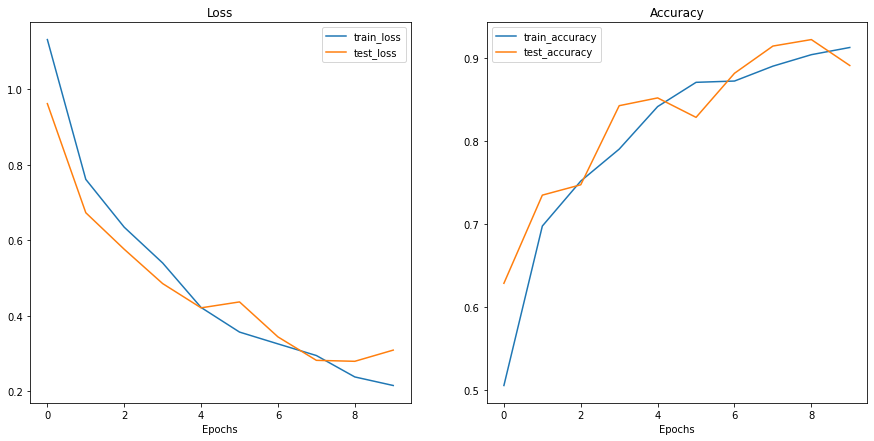

In [43]:
plot_loss_curves(model_1_results)